<a href="https://colab.research.google.com/github/aakashr30/Credicard-AnalysisUsing-CLUSTERING/blob/main/(credits_card_number)Project_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/0 (1).MKCE/Datasets/Credit Card Customer Data.xlsx")
data

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [ ]:
data2 = data.drop(['Sl_No','Customer Key'],axis=1)

In [ ]:
data2

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


In [ ]:
data2.shape

(660, 5)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=4,random_state=42)

In [ ]:
data['Group or Cluster'] = km.fit_predict(data)

In [ ]:
data.head

<bound method NDFrame.head of      Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0        1         87073            100000                   2   
1        2         38414             50000                   3   
2        3         17341             50000                   7   
3        4         40496             30000                   5   
4        5         47437            100000                   6   
..     ...           ...               ...                 ...   
655    656         51108             99000                  10   
656    657         60732             84000                  10   
657    658         53834            145000                   8   
658    659         80655            172000                  10   
659    660         80150            167000                   9   

     Total_visits_bank  Total_visits_online  Total_calls_made  \
0                    1                    1                 0   
1                    0                   10    

In [ ]:
data['Group or Cluster'].value_counts

<bound method IndexOpsMixin.value_counts of 0      5
1      1
2      1
3      1
4      5
      ..
655    5
656    5
657    7
658    2
659    2
Name: Group or Cluster, Length: 660, dtype: int32>

In [ ]:
import seaborn as sns

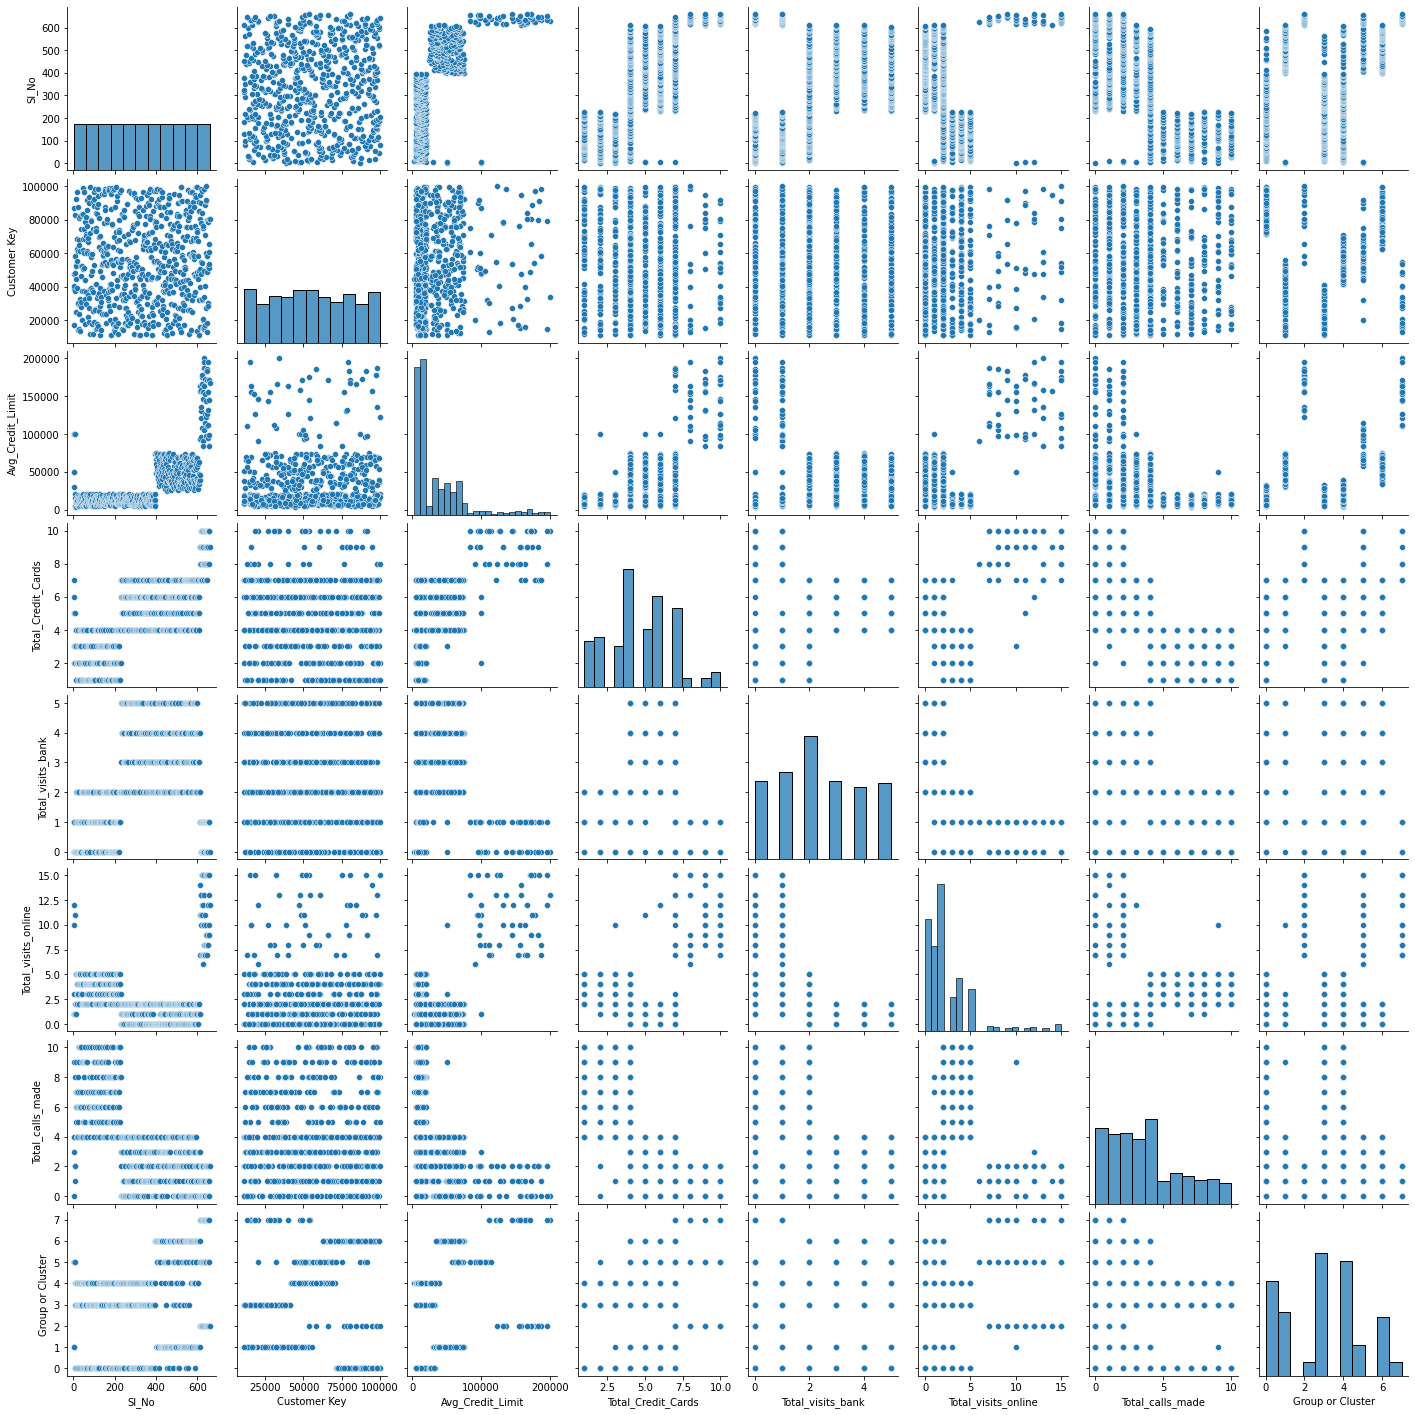

In [ ]:
sns.pairplot(data)

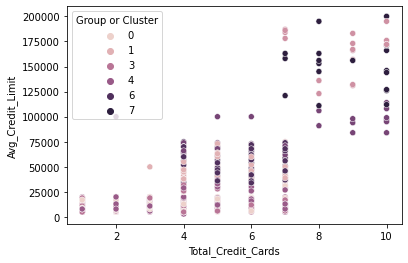

In [ ]:
sns.scatterplot(x=data['Total_Credit_Cards'],
                y=data['Avg_Credit_Limit'],
                hue=data['Group or Cluster'])

In [ ]:
wcss=[]  #With in cluster sum of squares

for i in range(1,7):
  kmeans=KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                tol=0.0001,  
                verbose=0, 
                random_state=None, 
                copy_x=True,  
                algorithm='auto')
  
  kmeans.fit(data)

  wcss.append(kmeans.inertia_)  #Do for iterations 1 to 7 clusters, find out the min wcsss and add them

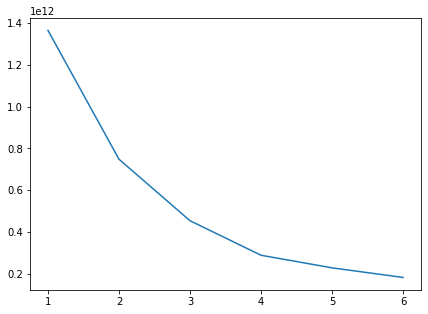

In [ ]:
import matplotlib.pyplot as plt
#elbow graph
fig= plt.subplots(figsize=(7,5))
plt.plot(range(1,7),wcss)

In [ ]:
#Optimum number of clusters and their characteristics
import sklearn.metrics as metrics
for i in range(3,10):
    kmeans=KMeans(n_clusters=i,
                  init="k-means++",
                  random_state=200)
    kmeans.fit(data)
    labels=kmeans.labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(data,
                                         labels,
                                         metric="euclidean",
                                         sample_size=1000,
                                         random_state=200)))

Silhouette score for k(clusters) = 3 is 0.4152438816293236
Silhouette score for k(clusters) = 4 is 0.4596787472908209
Silhouette score for k(clusters) = 5 is 0.4583544172582394
Silhouette score for k(clusters) = 6 is 0.4343734807578082
Silhouette score for k(clusters) = 7 is 0.43883964234682427
Silhouette score for k(clusters) = 8 is 0.44373400556754106
Silhouette score for k(clusters) = 9 is 0.433391449337918


In [ ]:
km = KMeans(3)
km.fit(data)
data['Group or Cluster'] = km.fit_predict(data)

In [ ]:
first_group = data[data['Group or Cluster']==0]
second_group = data[data['Group or Cluster']==1]
third_group = data[data['Group or Cluster']==2]

In [ ]:
#Get the output
first_group.to_csv('first_group.csv')
second_group.to_csv('second_group.csv')
third_group.to_csv('third_group.csv')

In [ ]:
data

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group or Cluster
0,1,87073,100000,2,1,1,0,2
1,2,38414,50000,3,0,10,9,1
2,3,17341,50000,7,1,3,4,1
3,4,40496,30000,5,1,1,4,1
4,5,47437,100000,6,0,12,3,2
...,...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0,2
656,657,60732,84000,10,1,13,2,0
657,658,53834,145000,8,1,9,1,2
658,659,80655,172000,10,1,15,0,2


In [ ]:
first_group

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group or Cluster
5,6,58634,20000,3,0,1,8,0
8,9,82490,5000,2,0,2,2,0
12,13,92503,11000,1,2,5,9,0
14,15,68517,6000,2,2,4,6,0
16,17,62617,15000,2,1,2,4,0
...,...,...,...,...,...,...,...,...
605,606,85234,36000,5,2,2,3,0
607,608,90191,34000,6,3,1,0,0
611,612,80623,46000,7,4,1,3,0
628,629,75009,84000,9,1,15,0,0


In [ ]:
second_group

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group or Cluster
1,2,38414,50000,3,0,10,9,1
2,3,17341,50000,7,1,3,4,1
3,4,40496,30000,5,1,1,4,1
7,8,37376,15000,3,0,1,1,1
9,10,44770,3000,4,0,1,7,1
...,...,...,...,...,...,...,...,...
603,604,44403,60000,6,3,2,3,1
606,607,31948,63000,5,3,1,3,1
608,609,49341,47000,4,4,1,0,1
609,610,11562,38000,4,3,2,0,1


In [ ]:
third_group

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group or Cluster
0,1,87073,100000,2,1,1,0,2
4,5,47437,100000,6,0,12,3,2
6,7,48370,100000,5,0,11,2,2
612,613,94391,157000,9,1,14,1,2
613,614,50598,94000,9,1,11,0,2
614,615,40019,163000,8,1,7,1,2
615,616,77910,131000,9,1,10,1,2
616,617,89832,96000,10,1,11,2,2
617,618,98216,136000,8,0,13,0,2
618,619,54495,121000,7,0,13,2,2
